# Administering your GIS

ArcGIS administrators can leverage the `gis.admin` module of **ArcGIS API for Python** to assist with and automate their administrative tasks. These tasks can include anything from checking the status of servers, assigning licenses to named user accounts to modifying the GIS's look and feel.

ArcGIS Online Organizations (AGOL) and ArcGIS Enterprise instances vary on the amount of customization you can make. Enterprise organizations can be customized much more than ArcGIS Online organizations as Enterprise allows administrations full access. No matter what your organization is, the API and usage is identical. The table below illustrates the extent to which each can be customized and administered.

<h3>Organizational differences</h3>

<table border="1" class="dataframe"><thead><tr style="text-align: right;"><th>Function</th><th>ArcGIS Online</th><th>ArcGIS Enterprise</th></tr></thead><tbody><tr><td>collaborations</td><td>X</td><td>X</td></tr><tr><td>credits</td><td>X</td><td></td></tr><tr><td>federation</td><td></td><td>X</td></tr><tr><td>license</td><td>X</td><td>X</td></tr><tr><td>logs</td><td></td><td>X</td></tr><tr><td>machines</td><td></td><td>X</td></tr><tr><td>metadata</td><td>X</td><td>X</td></tr><tr><td>password_policy</td><td>X</td><td>X</td></tr><tr><td>security</td><td></td><td>X</td></tr><tr><td>server</td><td></td><td>X</td></tr><tr><td>site</td><td></td><td>X</td></tr><tr><td>system</td><td></td><td>X</td></tr><tr><td>ux</td><td>X</td><td>X</td></tr></tbody></table>

Most properties on ArcGIS Online are available on ArcGIS Enterprise except 'credit reporting' because ArcGIS Enterprise does not consume credits.

<blockquote><b>Note:</b> You need to log in using a named user account with administrator privileges. When you login, the API detects if you are an organizational administrator, then, the <b>GIS</b> object will ensure you gain access to the <b>admin</b> module.</blockquote>


**Table of Contents**
 - [Managing named user licenses and entitlements](#Managing-named-user-licenses-and-entitlements)
  - [Listing apps licensed through the organization](#Listing-apps-licensed-through-the-organization)
  - [Getting available licenses for an app](#Getting-available-licenses-for-an-app)
  - [Querying extensions assigned to a named user account](#Querying-extensions-assigned-to-a-named-user-account)
  - [Assigning licenses and entitlements to a named user account](#Assigning-licenses-and-entitlements-to-a-named-user-account)
  - [Revoking licenses from a named user account](#Revoking-licenses-from-a-named-used-account)
 - [Managing ArcGIS Online credits](#Managing-ArcGIS-Online-credits)
  - [Viewing available credits](#Viewing-available-credits:)
  - [Managing credits through credit budgeting](#Managing-credits-through-credit-budgeting)
   - [Allocating credits to a user](#Allocating-credits-to-a-user)
   - [Checking credits assigned and available to a user](#Checking-credits-assigned-and-available-to-a-user)
 - [Attaching and removing servers from your GIS](#Attaching-and-removing-ArcGIS-Servers-from-your-GIS)
  - [Validating your servers](#Validating-your-servers)
  - [Unfederating a server](#Unfederating-a-server)
 - [Querying Portal logs](#Querying-Portal-logs)
  - [Filtering and querying Portal logs](#Filtering-and-querying-Portal-logs)
  - [Clearing logs](#Clearing-logs)
 - [Managing GIS security](#Managing-GIS-security)
  - [Working with password policies](#Working-with-password-policies)
    - [Inspecting password policy](#Inspecting-password-policy)
    - [Updating password policy](#Updating-password-policy)
    - [Resetting password policy](#Resetting-password-policy)
  - [Working with security configurations](#Working-with-security-configurations)
    - [Working with certificates](#SSL-certificates)
    - [Enterprise identity store](#Enterprise-identity-store)
 - [Managing Enterprise licenses and system settings](#Managing-Enterprise-licenses-and-system-settings)
  - [Inspecting licenses for Portal for ArcGIS](#Inspecting-licenses-for-Portal-for-ArcGIS)
  - [Releasing ArcGIS Pro licenses checked out for offline use](#Releasing-ArcGIS-Pro-licenses-checked-out-for-offline-use)
  - [Inspecting the machines powering your Portal for ArcGIS](#Inspecting-the-machines-powering-your-Portal-for-ArcGIS)
  - [Inspecting system directories](#Inspecting-system-directories)
  - [Inspecting web adaptors](#Inspecting-web-adaptors)
  - [Inspecting other system properties](#Inspecting-other-system-properties)

In [ ]:
from arcgis.gis import GIS
gis = GIS("https://portalname.domain.com/webadaptor", "username", "password")

## Managing named user licenses and entitlements
ArcGIS Online and Enterprise support assigning licenses for Esri premium apps such as ArcGIS Pro, Navigator for ArcGIS, AppStudio for ArcGIS Standard, Drone2Map for ArcGIS, ArcGIS Business Analyst web app, ArcGIS Community Analyst, GeoPlanner for ArcGIS, and other apps sold through ArcGIS Marketplace that use a per-member license type. 

As an administrator, you use the `gis.admin.license` class of Python API to view, manage and specify which members have licenses for these apps. To learn more about named user licensing model visit [manage licenses help](http://doc.arcgis.com/en/arcgis-online/administer/manage-licenses.htm).

### Listing apps licensed through the organization
To list all the apps currently licensed through your organization, use the `all()` method:

In [ ]:
gis.admin.license.all()

[<ArcGIS Pro License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <Drone2Map for ArcGIS License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <GeoPlanner for ArcGIS License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <AppStudio for ArcGIS Standard License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Community Analyst License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <Navigator for ArcGIS License at https://geosaurus.maps.arcgis.com/sharing/rest/>,
 <ArcGIS Business Analyst License at https://geosaurus.maps.arcgis.com/sharing/rest/>]

You can get the license for a particular app using the `get()` method:

In [ ]:
pro_license = gis.admin.license.get('ArcGIS Pro')
pro_license

<ArcGIS Pro License at https://geosaurus.maps.arcgis.com/sharing/rest/>

In [ ]:
type(pro_license)

arcgis.gis.admin._license.License

### Getting available licenses for an app
To query the list of all users licensed for an app, call the `all()` method from the `License` object corresponding to that app:

In [ ]:
#get all users licensed for ArcGIS Pro
pro_license.all()

[{'disconnected': False,
  'entitlements': ['dataInteropN',
   'dataReviewerN',
   'desktopBasicN',
   'geostatAnalystN',
   'networkAnalystN',
   'publisherN',
   'smpLAmericaN',
   'smpNAmericaN'],
  'lastLogin': -1,
  'username': 'amani_geosaurus'}]

Using the `plot()` method of the `License` object, you can quickly pull up a bar chart showing the number of assigned and remaining licenses for each extension of the app.

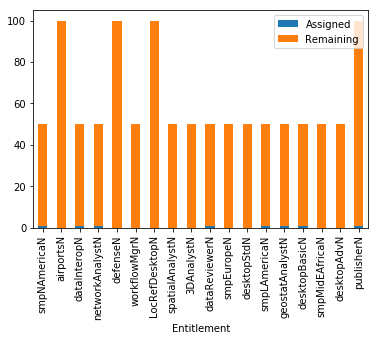

In [ ]:
%matplotlib inline
pro_license.plot()

Using the `License` object's `report` property, you can view the same information as a Pandas DataFrame table

In [ ]:
pro_license.report

,Entitlement,Total,Assigned,Remaining
0,smpNAmericaN,50,1,49
1,airportsN,100,0,100
2,dataInteropN,50,1,49
3,networkAnalystN,50,1,49
4,defenseN,100,0,100
5,workflowMgrN,50,0,50
6,LocRefDesktopN,100,0,100
7,spatialAnalystN,50,0,50
8,3DAnalystN,50,0,50
9,dataReviewerN,50,1,49


### Querying extensions assigned to a named user account

You can find which of the app's extensions are assigned to a particular user using the `License` object's `user_entitlement()` method:

In [ ]:
pro_license.user_entitlement('username')

{'disconnected': False,
 'entitlements': ['dataInteropN',
  'dataReviewerN',
  'desktopBasicN',
  'geostatAnalystN',
  'networkAnalystN',
  'publisherN',
  'smpLAmericaN',
  'smpNAmericaN'],
 'lastLogin': -1,
 'username': 'amani_geosaurus'}

### Assigning licenses and entitlements to a named user account
You can assign licenses to an application and its extensions using the `assign()` method.

In [ ]:
pro_license.assign(username='arcgis_python', entitlements='desktopBasicN')

True

### Revoking licenses from a named used account
To revoke an app's license from a user, call the `revoke()` method from the corresponding `License` object. To revoke all the entitlements, pass `*` as a string.

In [ ]:
pro_license.revoke(username='arcgis_python', entitlements='*')

True

## Managing ArcGIS Online credits
If your GIS is an organization on ArcGIS Online, you would notice a `credits` property exposed on your `admin` object. You can use this to view, allocate credits to your users, set a default limit etc. To learn more about credits refer [here](http://doc.arcgis.com/en/arcgis-online/reference/credits.htm).

<blockquote><b>Note:</b> ArcGIS Enterprises do not support the concept of credits. Hence if your GIS is an instance of Enterprise, you would not see the `credits` property. </blockquote>

### Viewing available credits:

In [ ]:
gis.admin.credits.credits

80404.89

### Managing credits through credit budgeting
The credit budgeting feature of ArcGIS Online allows administrators to view, limit and allocate credits to its users. Learn more about [credit budgeting here](http://doc.arcgis.com/en/arcgis-online/administer/configure-credits.htm).

You can use the `enable()` method to turn on credit budgeting.

In [ ]:
gis.admin.credits.enable()

True

You can use the `is_enabled()` property to verify if credit budgeting is turned on.

In [ ]:
gis.admin.credits.is_enabled

True

Once you turn on credit budgeting, you can set a default limit for the number of credits for each user. In addition to this, you can set custom limits to users as well. Default limit applies when you create a new user and do not set a custom limit.

In [ ]:
gis.admin.credits.default_limit

8000

#### Allocating credits to a user
You can use the `allocate()` and `deallocate()` methods to allocate custom number of credits or remove credits from a named user.

In [ ]:
#assign one thenth of the available licenses to arcgis_python account
api_acc_credits = gis.admin.credits.credits / 10
gis.admin.credits.allocate(username='arcgis_python', credits=api_acc_credits)

True

#### Checking credits assigned and available to a user

In [ ]:
api_acc = gis.users.get('arcgis_python')
api_acc

<User username:arcgis_python>

When you turn on credit budgeting (using the `enable()` method), the `User` object gets additional properties to indicate the `assignedCredits` and remaining `avialableCredits`. Thus, you can verify as shown below:

In [ ]:
api_acc.assignedCredits

8039.734

In [ ]:
api_acc.availableCredits

8039.734

As the user continues to use the credits, the `availableCredits` property can be used to check how much is available for that account. If a user does not have a limit set, then the total available credits in the org become their available credits. The account shown below as not custom limit, hence, it inherits the org's total limit.

In [ ]:
rohit = gis.users.get('rsingh_geosaurus')
rohit.availableCredits

80397.34

#### Disable credit budgeting
Yon disable this feature by calling the `disable()` method.

In [ ]:
gis.admin.credits.disable()

True

## Attaching and removing ArcGIS Servers from your GIS
If your GIS is an instance of ArcGIS Enterprise, you can build it up by federating (attaching) ArcGIS Server sites to your Enterprise. During this step, you can assign a role to your server - such as Hosting or Federated. You can also assign a function such as 'Raster Analysis', 'GeoAnalytics' etc. to designate it a purpose. Federating and maintaining your server bank is an important administrative task. To learn more about this topic and the implications of federation, refer [here](http://server.arcgis.com/en/server/latest/administer/windows/federate-an-arcgis-server-site-with-your-portal.htm).

<blockquote><b>Note:</b> Federation only applies to ArcGIS Enterprise orgs. If your GIS is an org on ArcGIS Online, you cannot perform these tasks</blockquote>

The `Federation` class of the `admin` module allows GIS administrators to script and automate tasks such as listing the serves in a GIS, identifying their role and function, federating new servers, unfederating servers under maintenance, validating the list of servers etc.

Get the list of servers federated to the GIS:

In [ ]:
gis.admin.federation.servers

{'servers': [{'adminUrl': 'https://Dev005223.esri.com:6443/arcgis',
   'id': 'COgNhKlPsIjGrCLV',
   'isHosted': True,
   'name': 'Dev005223.esri.com:6443',
   'serverFunction': '',
   'serverRole': 'HOSTING_SERVER',
   'url': 'https://Dev005223.esri.com/server',
   'webgisServerTrustKey': ''},
  {'adminUrl': 'https://dev005331.esri.com:6443/arcgis',
   'id': 'GFyaVzJXiogsxKxH',
   'isHosted': False,
   'name': 'dev005331.esri.com:6443',
   'serverFunction': 'RasterAnalytics',
   'serverRole': 'FEDERATED_SERVER',
   'url': 'https://dev005331.esri.com/server',
   'webgisServerTrustKey': ''}]}

There are 2 servers federated to this GIS, the first is a `HOSTING_SERVER` and the second a `FEDERATED_SERVER`. The `serverFunction` of the second server is set to `RasterAnalytics`.

### Validating your servers
To validate all the servers attached to your GIS, call the `validate_all()` method. To validate a particular server, call `validate()` and pass the server info.

In [ ]:
gis.admin.federation.validate_all()

{'serversStatus': [{'messages': ["ArcGIS Server administration URL 'https://Dev005223.esri.com:6443/arcgis' is accessible.",
    'Validating hosting server.',
    "ArcGIS Server 'https://Dev005223.esri.com:6443/arcgis' version matches with Portal for ArcGIS.",
    "Verified that server has a registered managed database '/enterpriseDatabases/AGSDataStore_ds_7jq2u67r'.",
    "The server managed database '/enterpriseDatabases/AGSDataStore_ds_7jq2u67r' validated successfully.",
    'Validated that the ArcGIS Server site is not in read-only mode.',
    'Validated that the publishing tools service of ArcGIS Server site is started.'],
   'serverId': 'COgNhKlPsIjGrCLV',
   'status': 'success'},
  {'messages': ["ArcGIS Server services URL 'https://dev005331.esri.com/server' cannot be validated against 'https://dev005331.esri.com/server/rest/info'. If the service URL is a proxy URL verify it is accessible to clients.",
    'Error: java.net.UnknownHostException: dev005331.esri.com. '],
   'server

The second server reports a failure as the Enterprise is unable to reach or ping it. This server requires maintenance.

### Unfederating a server
You remove a server from the GIS by calling the `unfederate()` method and passing the `serverId`.

In [ ]:
gis.admin.federation.servers[1]['id']

'GFyaVzJXiogsxKxH'

In [ ]:
gis.admin.federation.unfederate('GFyaVzJXiogsxKxH')

True

## Querying Portal logs
Portal for ArcGIS records events that occur, and any errors associated with those events, to logs. Logs are an important tool for monitoring and troubleshooting problems with your portal. Information in the logs will help you identify errors and provide context on how to address problems. The logs also comprise a history of the events that occur over time.

For example, the following events are recorded in the logs:

 - Installation and upgrade events, such as authorizing the software and creating the portal website
 - Publishing of services and items, such as hosted services, web maps, and data items
 - Content management events, such as sharing items, changing item ownership, and adding, updating, moving, and deleting items
 - Security events, such as users logging in to the portal, creating, deleting, and disabling users, creating and changing user roles, updating HTTP and HTTPS settings, import and export of security certificates, and updating the portal's identity store
 - Organization management events, such as adding and configuring groups, adding or removing users from a group, configuration of the gallery, basemaps, utility services, and federated servers, and configuring log settings and deleting logs
 - General events, such as updating the portal's search index and restarting the portal

Understanding log messages is important to maintain your GIS. Refer [here](http://server.arcgis.com/en/portal/latest/administer/windows/about-portal-logs.htm) to learn more about logging in general and [here](http://server.arcgis.com/en/portal/latest/administer/windows/work-with-portal-logs.htm#ESRI_SECTION2_F96B4BDF7FBD4EFC865E316C1DFB460C) to understand what gets logged and what the messages mean.

Using the `Logs` class of the `admin` module, administrators can query and work with Portal log messages. You can query the logging level and other settings from the `settings` property:

In [ ]:
gis.admin.logs.settings

{'logDir': 'C:\\arcgisportal\\logs\\',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False}

### Filtering and querying Portal logs
Using the `query()` method, you can filter and search for Portal logs. Refer to the [query API ref doc](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.admin.html#arcgis.gis.admin.Logs.query) for all the arguments supported. In the example below, logs for the previous 10 days is searched.

In [ ]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
start_time

datetime.datetime(2017, 8, 1, 15, 5, 32, 941945)

You can pass a Python `Datetime` object to the time arguments.

In [ ]:
recent_logs = gis.admin.logs.query(start_time = start_time)

#print a message as a sample
recent_logs['logMessages'][0]

{'code': 207051,
 'elapsed': '',
 'machine': 'DEV005223.ESRI.COM',
 'message': "Validation failed for federated server 'https://dev005331.esri.com:6443/arcgis'.",
 'methodName': '',
 'process': '1956',
 'source': 'Portal Admin',
 'thread': '14',
 'time': 1502486731894,
 'type': 'WARNING',
 'user': ''}

You can construct a Pandas `DataFrame` from the query result and visualize the logs as a table:

In [ ]:
log_df = pd.DataFrame.from_records(recent_logs)
log_df.head(5) #display the first 5 records

,endTime,hasMore,logMessages,startTime
0,1501718081748,False,"{'elapsed': '', 'message': 'Validation failed ...",1502486731894
1,1501718081748,False,"{'elapsed': '', 'message': ' Failed to update ...",1502486731894
2,1501718081748,False,"{'elapsed': '', 'message': 'Validation failed ...",1502486731894
3,1501718081748,False,"{'elapsed': '', 'message': 'Validation failed ...",1502486731894
4,1501718081748,False,"{'elapsed': '', 'message': ' Failed to accept ...",1502486731894


Once you have the logs as a `DataFrame`, you can save it to disk in any format you choose. For instance, you can save it to a `csv` file for archival.

In [ ]:
log_df.to_csv('./portal_logs_last_10_days.csv')

### Clearing logs
You can remove old logs and free up space on your Portal by calling the `clean()` method. Note, this action is not reversible.

In [ ]:
gis.admin.logs.clean()

True

## Managing GIS security
One of the important tasks you carry out as an administrator is managing the security settings of your GIS. With the `admin` module, you can accomplish tasks such as setting the password policy, managing security certificates etc.

### Working with password policies
#### Inspecting password policy

You can use the `PasswordPolicy` class in the `admin` module to inspect and update the policy for your GIS. This is applicable if you GIS uses a built-in identity store.

In [ ]:
existing_policy = gis.admin.password_policy.policy
existing_policy

{
  "passwordPolicy": {
    "created": -1,
    "modified": -1,
    "type": "default",
    "minLetter": 1,
    "minLength": 8,
    "minDigit": 1
  }
}

#### Updating password policy
You can update this policy to any desired standard. In the example below, the following additional criteria is added.

 - Contains at least one letter (A-Z, a-z)
 - Contains at least one upper case letter (A-Z)
 - Contains at least one lower case letter (a-z)
 - Contains at least one number (0-9)
 - Contains at least one special (non-alphanumeric) character
 - Password will expire after `90` days
 - Members may not reuse their last `5` passwords

In [ ]:
from copy import deepcopy
new_policy = deepcopy(existing_policy)
new_policy['passwordPolicy']['minLength'] = 10
new_policy['passwordPolicy']['minUpper'] = 1
new_policy['passwordPolicy']['minLower'] = 1
new_policy['passwordPolicy']['minDigit'] = 1
new_policy['passwordPolicy']['minOther'] = 1
new_policy['passwordPolicy']['expirationInDays'] = 90
new_policy['passwordPolicy']['historySize'] = 5

To update the policy, simply set the `policy` property with the new values

In [ ]:
gis.admin.password_policy.policy = new_policy['passwordPolicy']

Query the GIS to get the updated policy

In [ ]:
gis.admin.password_policy.policy

{
  "passwordPolicy": {
    "minUpper": 1,
    "expirationInDays": 90,
    "modified": -1,
    "historySize": 5,
    "type": "custom",
    "minLetter": 2,
    "created": 1502493886765,
    "minOther": 1,
    "minLength": 10,
    "minLower": 1,
    "minDigit": 1
  }
}

#### Resetting password policy
You can reset the policy to the default by calling the `reset()` method.

In [ ]:
gis.admin.password_policy.reset()

True

### Working with security configurations
The `config` property of the `Security` class gives you a snapshot of your security configuration

In [ ]:
gis.admin.security.config

{'defaultLevelForUser': '2',
 'defaultRoleForUser': 'account_user',
 'disableServicesDirectory': False,
 'enableAutomaticAccountCreation': False,
 'groupStoreConfig': {'properties': {'isPasswordEncrypted': 'true'},
  'type': 'BUILTIN'},
 'userStoreConfig': {'properties': {'isPasswordEncrypted': 'true'},
  'type': 'BUILTIN'},
 'webgisServerTrustKey': '7odWDm93E+Aux2he/7YOuq1h4wURE4DfrEWOOxazmaE='}

#### SSL certificates
The `SSLCertificates` class provides you with a set of methods to search for certificates, import new certificates and update existing ones. The `SSLCertificate` object that you get when you call the `get()` or `list()` methods on this class allows you to inspect, update or export individual certificates. To learn about all the tasks that can be accomplished, refer to the [API REF doc](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.admin.html#sslcertificates).

In [ ]:
gis.admin.security.ssl.list()

[<SSLCertificate at https://dev005223.esri.com/portal/portaladmin/security/sslCertificates/portal>,
 <SSLCertificate at https://dev005223.esri.com/portal/portaladmin/security/sslCertificates/samlcert>,
 <SSLCertificate at https://dev005223.esri.com/portal/portaladmin/security/sslCertificates/dev005219>]

You can download or export the certificate to disk:

In [ ]:
portal_cert = gis.admin.security.ssl.list()[0]
portal_cert.export(out_path = './')

'./portal.cer'

#### Enterprise identity store
If your GIS uses an enterprise identity store instead of the built-in, you can use the `EnterpriseUsers` class and `EnterpriseGroups` class to search for users and user groups in the enterprise user database.

In [ ]:
gis.admin.security.enterpriseusers

{
  "totalUsers": 12
}

In [ ]:
gis.admin.security.groups.properties

{
  "totalGroups": 382
}

## Managing Enterprise licenses and system settings
As an administrator, you can manage the licenses of the Enterprise and all the apps licensed through your Enterprise using the `system.licenses` class of the `admin` sub module. This functionality is different from [managing named user licenses and entitlements](#Managing-named-user-licenses-and-entitlements) mentioned in the beginning of this guide. This section shows you how to import and remove entitlements for different apps, the number of named user accounts that you are licensed to create and the number remaining etc.

### Inspecting licenses for Portal for ArcGIS
Calling `system.licenses.properties` will return a dictionary containing information about your license for using Portal for ArcGIS application. The dictionary below reveals the license is current, `12` is the number of named user accounts created so far and the `75` is the max licensed. The `features` dictionary reveals the details on number of level 1 and 2 users that can be created.

In [ ]:
gis.admin.system.licenses.properties

{
  "isValid": true,
  "currentRegisteredMembers": 12,
  "maximumRegisteredMembers": 75,
  "expiration": 1508223600000,
  "features": [
    {
      "level": "1",
      "name": "esriPortalLvl1",
      "displayName": "Portal for ArcGIS",
      "isValid": true,
      "maximumRegisteredMembers": 25,
      "version": "10.5",
      "expiration": 1508223600000,
      "currentRegisteredMembers": 0
    },
    {
      "level": "2",
      "name": "esriPortalLvl2",
      "displayName": "Portal for ArcGIS",
      "isValid": true,
      "maximumRegisteredMembers": 50,
      "version": "10.5",
      "expiration": 1508223600000,
      "currentRegisteredMembers": 12
    }
  ]
}

Using Python's `datetime` module, you can conver the date to human readable form:

In [ ]:
from datetime import datetime
datetime.fromtimestamp(round(gis.admin.system.licenses.properties.expiration/1000))

datetime.datetime(2017, 10, 17, 0, 0)

### Releasing ArcGIS Pro licenses checked out for offline use
If a user checks out an ArcGIS Pro license for offline or disconnected use, and is unable to check it back in, you can release the license for the specified account by calling `release_license()` method. Learn more about [offline licenses in ArcGIS Pro](http://pro.arcgis.com/en/pro-app/get-started/named-user-licenses.htm#ESRI_SECTION1_3379AFCFCE8D44EE8395A91E1A484594).

In [ ]:
gis.admin.system.licenses.release_license('username')

{'status': 'success'}

### Inspecting the machines powering your Portal for ArcGIS
You can query the machines powering your Portal for ArcGIS application using the `Machines` class at `admin.machines`. You can inspect machine status, and unregister those under repair.

In [ ]:
gis.admin.machines.list()

[<Machine at https://dev005223.esri.com/portal/portaladmin/machines>]

In [ ]:
mac1 = gis.admin.machines.list()[0]
mac1.properties

{
  "role": "",
  "adminURL": "https://dev005223.esri.com:7443/arcgis",
  "machineName": "DEV005223.ESRI.COM"
}

Query the status of a machine.

In [ ]:
mac1.status()

True

### Inspecting system directories
You can inspect the physical location of various system directories used by the Portal for ArcGIS application:

In [ ]:
portal_dir_list = gis.admin.system.directories
portal_dir_list[0].properties

{
  "name": "content",
  "physicalPath": "{\"type\":\"fileStore\",\"provider\":\"FileSystem\",\"connectionString\":\"txfL1Ma_fryXmqsmyNt8Zfm4UEuNL79E-qaf8WbGB-8.\",\"isConnectionStringEncrypted\":true}",
  "directoryType": "CONTENT",
  "description": "The content directory."
}

In [ ]:
for portal_dir in portal_dir_list:
    print(portal_dir.properties.name + " | " + portal_dir.properties.physicalPath)

content | {"type":"fileStore","provider":"FileSystem","connectionString":"txfL1Ma_fryXmqsmyNt8Zfm4UEuNL79E-qaf8WbGB-8.","isConnectionStringEncrypted":true}
index | C:\arcgisportal\index
db | C:\arcgisportal\db
temp | C:\arcgisportal\temp


### Inspecting web adaptors
You can query the web adaptors serving the Portal for ArcGIS application using the `system.web_adaptors.list()` method. This returns you a list of `WebAdaptor` objects. You can use this object to query the properties such as IP address, version and also unregister the adaptor for maintenance.

In [ ]:
gis.admin.system.web_adaptors.list()

[<WebAdaptor at https://dev005223.esri.com/portal/portaladmin/system/webadaptors/2f3a93d7-f50b-4ce6-8244-335fbfe1dfba>]

In [ ]:
wa = gis.admin.system.web_adaptors.list()[0]
wa.properties

{
  "webAdaptorURL": "https://dev005223.esri.com/portal",
  "reconnectServerOnFailureInterval": 1,
  "id": "2f3a93d7-f50b-4ce6-8244-335fbfe1dfba",
  "refreshServerListInterval": 1,
  "httpsPort": 443,
  "machineName": "dev005223.esri.com",
  "description": "",
  "machineIP": "10.44.8.245",
  "httpPort": 80
}

In [ ]:
wa.url

'https://dev005223.esri.com/portal/portaladmin/system/webadaptors/2f3a93d7-f50b-4ce6-8244-335fbfe1dfba'

### Inspecting other system properties
**Database**

In [ ]:
gis.admin.system.database

{'adminAccount': 'admin',
 'name': 'gwdb',
 'version': 'psql (PostgreSQL) 9.3.12'}

**Index status**

In [ ]:
gis.admin.system.index_status

{'indexes': [{'databaseCount': 54, 'indexCount': 54, 'name': 'users'},
  {'databaseCount': 330, 'indexCount': 330, 'name': 'groups'},
  {'databaseCount': 7513, 'indexCount': 7513, 'name': 'search'}]}

**Supported languages**

In [ ]:
gis.admin.system.languages

{'languages': {'esri_ar': True,
  'esri_bs': True,
  'esri_cs': True,
  'esri_da': True,
  'esri_de': True,
  'esri_el': True,
  'esri_en': True,
  'esri_es': True,
  'esri_et': True,
  'esri_fi': True,
  'esri_fr': True,
  'esri_he': True,
  'esri_hi': True,
  'esri_hk': True,
  'esri_hr': True,
  'esri_id': True,
  'esri_it': True,
  'esri_ja': True,
  'esri_ko': True,
  'esri_lt': True,
  'esri_lv': True,
  'esri_nb': True,
  'esri_nl': True,
  'esri_pl': True,
  'esri_po': True,
  'esri_pt': True,
  'esri_ro': True,
  'esri_ru': True,
  'esri_sr': True,
  'esri_sv': True,
  'esri_th': True,
  'esri_tr': True,
  'esri_tw': True,
  'esri_vi': True,
  'esri_zh': True}}